In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Path to your MMASH dataset folder
DATA_DIR = r'mmash\mmash\MMASH\DataPaper' 

'''
# List of files in the MMASH dataset
files = {
    'user_info': 'user_info.csv',
    'sleep': 'sleep.csv',
    'RR': 'RR.csv',
    'questionnaire': 'questionnaire.csv',
    'activity': 'Activity.csv',
    'actigraph': 'Actigraph.csv',
    'saliva': 'saliva.csv'
}
'''

"\n# List of files in the MMASH dataset\nfiles = {\n    'user_info': 'user_info.csv',\n    'sleep': 'sleep.csv',\n    'RR': 'RR.csv',\n    'questionnaire': 'questionnaire.csv',\n    'activity': 'Activity.csv',\n    'actigraph': 'Actigraph.csv',\n    'saliva': 'saliva.csv'\n}\n"

In [4]:
activity_durations = {}

activity_labels = {
    1: "Sleeping",
    2: "Lying down",
    3: "Sitting",
    4: "Light movement",
    5: "Medium movement",
    6: "Heavy movement",
    7: "Eating",
    8: "Small screen usage",
    9: "Large screen usage",
    10: "Caffeinated drinks",
    11: "Smoking",
    12: "Alcohol consumption"
}

In [5]:
# Convert 24:00 to 00:00 and handle the day change
def fix_time(row):
    if row['End'] == '24:00':
        row['End'] = '00:00'
        # Increment the day when time passes midnight
        row['Day'] = row['Day'] + 1
    return row

In [6]:
## QUESTIONNAIRE
user_folder = os.path.join(DATA_DIR, f"user_{1}")
activity_file = os.path.join(user_folder, "questionnaire.csv")
df_q = pd.read_csv(activity_file)
df_q.head()

,Unnamed: 0,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
0,0,47,41,43,5,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10


In [7]:
## ACTIGRAPH
user_folder = os.path.join(DATA_DIR, f"user_{1}")
activity_file = os.path.join(user_folder, "Actigraph.csv")
df_q = pd.read_csv(activity_file)
df_q.head()

,Unnamed: 0,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,day,time
0,82,0,0,0,0,68.0,0,1,0,0,0.00,1,10:10:22
1,83,11,4,7,1,68.0,0,1,0,0,13.64,1,10:10:23
2,84,0,21,10,0,68.0,0,0,1,0,23.26,1,10:10:24
3,85,0,1,24,0,68.0,0,0,1,0,24.02,1,10:10:25
4,86,34,14,63,1,154.0,0,1,0,0,72.95,1,10:10:26


In [ ]:
## ACTIVITY
user_folder = os.path.join(DATA_DIR, f"user_{1}")
activity_file = os.path.join(user_folder, "Activity.csv")
df_q = pd.read_csv(activity_file)
df_q.head()

,Unnamed: 0,Activity,Start,End,Day
0,0,2,10:00,10:22,1
1,1,9,10:37,10:40,1
2,2,10,10:40,10:45,1
3,3,6,10:55,11:00,1
4,4,2,11:00,11:20,1


In [ ]:
## RR
user_folder = os.path.join(DATA_DIR, f"user_{1}")
activity_file = os.path.join(user_folder, "RR.csv")
df_q = pd.read_csv(activity_file)
df_q.head()

,Unnamed: 0,ibi_s,day,time
0,1,0.258,1,10:10:17
1,2,0.319,1,10:10:18
2,3,0.266,1,10:10:18
3,4,0.401,1,10:10:18
4,5,1.089,1,10:10:19


In [ ]:
## SALIVA
user_folder = os.path.join(DATA_DIR, f"user_{1}")
activity_file = os.path.join(user_folder, "saliva.csv")
df_q = pd.read_csv(activity_file)
df_q.head()

,Unnamed: 0,SAMPLES,Cortisol NORM,Melatonin NORM
0,1,before sleep,0.034137,1.738385e-08
1,2,wake up,0.077939,6.747893e-09


In [ ]:
## SLEEP
user_folder = os.path.join(DATA_DIR, f"user_{1}")
activity_file = os.path.join(user_folder, "sleep.csv")
df_q = pd.read_csv(activity_file)
df_q.head()

,Unnamed: 0,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index
0,0,2,00:46,2,03:31,2,00:46,0,87.27,165,144,21,9,2.33,9.091,10,19.091
1,1,2,03:57,2,07:30,2,03:57,0,92.02,213,196,17,9,1.89,8.920,0,8.920


In [ ]:
## USER INFO
user_folder = os.path.join(DATA_DIR, f"user_{1}")
activity_file = os.path.join(user_folder, "user_info.csv")
df_q = pd.read_csv(activity_file)
df_q.head()

,Unnamed: 0,Gender,Weight,Height,Age
0,0,M,65,169,29


In [42]:
# Loop over all user folders
for user_id in range(1, 23):
    user_folder = os.path.join(DATA_DIR, f"user_{user_id}")
    activity_file = os.path.join(user_folder, "Activity.csv")
    
    if os.path.exists(activity_file):
        df_activity = pd.read_csv(activity_file)
        #df_activity = df_activity.apply(fix_time, axis=1)
        
        # Ensure 'Start' and 'End' are parsed as datetime
        # Adjust if your columns are named differently (e.g., 'start', 'end')
        #df_activity['Start'] = pd.to_datetime(df_activity['Start'])
        #df_activity['End']   = pd.to_datetime(df_activity['End'])
        
        df_activity['Start'] = df_activity['Start'].str.replace('24:00', '00:00')
        df_activity['End'] = df_activity['End'].str.replace('24:00', '00:00')
        df_activity['Start'] = pd.to_datetime(df_activity['Start'], errors='coerce')
        df_activity['End'] = pd.to_datetime(df_activity['End'], errors='coerce')

        # Fix cases where 'End' time was '24:00' by adding a day to the date
        df_activity.loc[df_activity['Start'] > df_activity['End'], 'End'] += pd.Timedelta(days=1)

        print(df_activity.head())

        # Calculate duration (in minutes) for each row
        # Adjust the column name for the activity code if needed (e.g., 'category' vs 'Activity')
        for idx, row in df_activity.iterrows():
            cat_code = row['Activity']  # e.g. numeric category ID (1..12)
            
            if cat_code not in activity_labels:
                continue  # Skip unknown activities
            
            start_t  = row['Start']
            end_t    = row['End']
            
            if pd.notnull(start_t) and pd.notnull(end_t) and pd.notnull(cat_code):
                duration_min = (end_t - start_t).total_seconds() / 60.0
                
                # Accumulate into the dictionary
                # If cat_code doesn't exist yet, initialize at 0
                if cat_code not in activity_durations:
                    activity_durations[cat_code] = 0
                activity_durations[cat_code] += duration_min
    else:
        print(f"Warning: {activity_file} not found for user_{user_id}")

   Unnamed: 0  Activity               Start                 End  Day
0           0         2 2025-03-26 10:00:00 2025-03-26 10:22:00    1
1           1         9 2025-03-26 10:37:00 2025-03-26 10:40:00    1
2           2        10 2025-03-26 10:40:00 2025-03-26 10:45:00    1
3           3         6 2025-03-26 10:55:00 2025-03-26 11:00:00    1
4           4         2 2025-03-26 11:00:00 2025-03-26 11:20:00    1
   Unnamed: 0  Activity               Start                 End  Day
0           0         2 2025-03-26 10:00:00 2025-03-26 10:20:00    1
1           1         6 2025-03-26 13:05:00 2025-03-26 13:25:00    1
2           2         6 2025-03-26 13:38:00 2025-03-26 13:40:00    1
3           3         9 2025-03-26 13:38:00 2025-03-26 13:40:00    1
4           4         2 2025-03-26 13:55:00 2025-03-26 14:00:00    1
   Unnamed: 0  Activity               Start                 End  Day
0           0         7 2025-03-26 09:50:00 2025-03-26 10:15:00    1
1           1         9 2025-03-26

C:\Users\atrey\AppData\Local\Temp\ipykernel_33092\2558387678.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_activity['Start'] = pd.to_datetime(df_activity['Start'], errors='coerce')
C:\Users\atrey\AppData\Local\Temp\ipykernel_33092\2558387678.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_activity['End'] = pd.to_datetime(df_activity['End'], errors='coerce')
C:\Users\atrey\AppData\Local\Temp\ipykernel_33092\2558387678.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_activity['Start'] = pd.to_datetime(df_activity['Start'], errors='coerce')
C:\Users\at

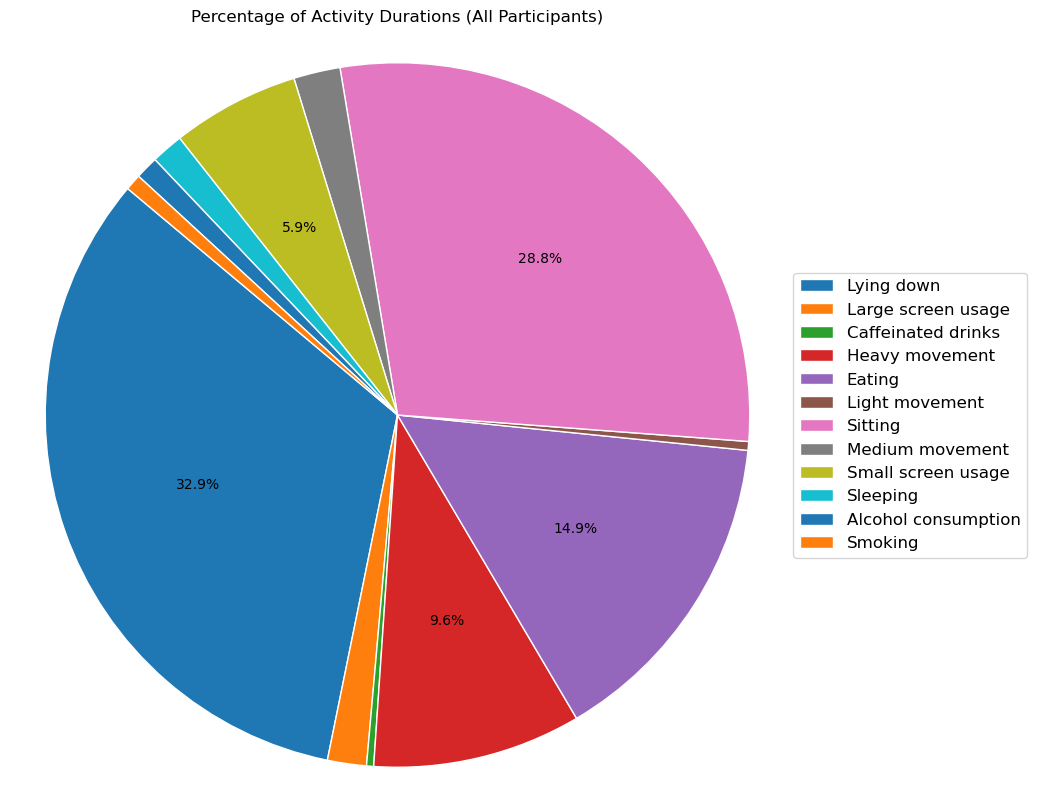

In [50]:
plt.figure(figsize=(10, 10))
plt.pie(
    durations, 
    # Remove labels parameter
    autopct=lambda p: f'{p:.1f}%' if p > 3 else '',  # Only show percentages for larger slices
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Add a legend outside the pie chart
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.title("Percentage of Activity Durations (All Participants)")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
#plt.tight_layout()
plt.show()


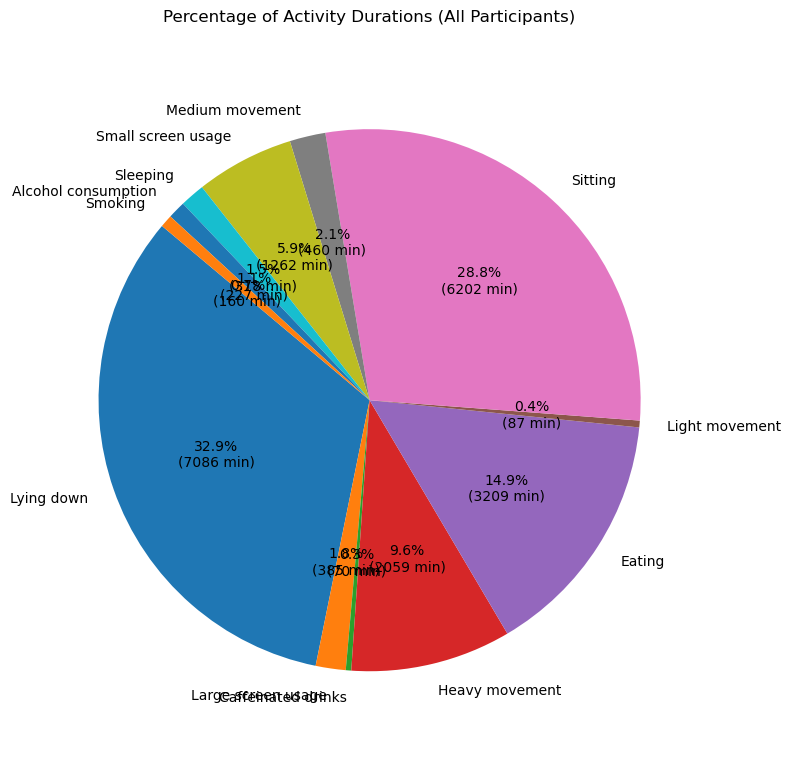

In [52]:
# Convert total durations into a pie chart
# First, map the numeric category codes to labels and handle missing categories
labels = []
durations = []
for cat_code, total_minutes in activity_durations.items():
    if cat_code in activity_labels:
        labels.append(activity_labels[cat_code])
    else:
        labels.append(f"Unknown_{cat_code}")
    durations.append(total_minutes)

# Calculate total duration across all activities
total_all_activities = sum(durations)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    durations, 
    labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({p * total_all_activities/100:.0f} min)',
    startangle=140
)

plt.title("Percentage of Activity Durations (All Participants)")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [56]:
import plotly.express as px

# Assume 'labels' and 'durations' are already computed
total_all_activities = sum(durations)
threshold = 5.0  # percentage threshold

# Compute percentage for each slice
percentages = [(d / total_all_activities) * 100 for d in durations]

# Create custom text: if a slice's percentage is >= threshold, show details; otherwise, show an empty string.
display_text = [
    f"{p:.1f}%<br>({d/60:.1f} hrs)" if p >= threshold else ""
    for p, d in zip(percentages, durations)
]

# Create the pie chart
fig = px.pie(
    names=labels,
    values=durations,
    title="Activity Durations of users"
)

# Update the trace: display our custom text inside the slices (only for major slices)
# The legend will still show all category names.
fig.update_traces(text=display_text, textinfo="text+percent", showlegend=True)

fig.show()




In [4]:
for name, file in files.items():
    file_path = os.path.join(data_folder, file)
    try:
        df = pd.read_csv(file_path)
        print(f"\nFile: {name} ({file})")
        print(f"Number of columns: {len(df.columns)}")
        print("Column names:")
        print(df.columns.tolist())
        print("head:")
        print(df.head())
    except Exception as e:
        print(f"Error reading {file_path}: {e}")


File: user_info (user_info.csv)
Number of columns: 5
Column names:
['Unnamed: 0', 'Gender', 'Weight', 'Height', 'Age']
head:
   Unnamed: 0 Gender  Weight  Height  Age
0           0      M      65     169   29

File: sleep (sleep.csv)
Number of columns: 17
Column names:
['Unnamed: 0', 'In Bed Date', 'In Bed Time', 'Out Bed Date', 'Out Bed Time', 'Onset Date', 'Onset Time', 'Latency', 'Efficiency', 'Total Minutes in Bed', 'Total Sleep Time (TST)', 'Wake After Sleep Onset (WASO)', 'Number of Awakenings', 'Average Awakening Length', 'Movement Index', 'Fragmentation Index', 'Sleep Fragmentation Index']
head:
   Unnamed: 0  In Bed Date In Bed Time  Out Bed Date Out Bed Time  Onset Date  \
0           0            2       00:46             2        03:31           2   
1           1            2       03:57             2        07:30           2   

  Onset Time  Latency  Efficiency  Total Minutes in Bed  \
0      00:46        0       87.27                   165   
1      03:57        0     

In [57]:
import os
import pandas as pd
import plotly.express as px

# Adjust this path to your local dataset directory
#DATA_DIR = r"path\to\MMASH\DataPaper"

# List to store each participant's chronotype
chronotypes = []

# Define a helper function to classify chronotype based on MEQ score
def classify_chronotype(meq):
    if pd.isnull(meq):
        return None
    elif meq < 41:
        return "Evening"
    elif 41 <= meq <= 58:
        return "Intermediate"
    else:
        return "Morning"

# Loop through each user folder and extract the MEQ score from questionnaire.csv
for user_id in range(1, 23):
    user_folder = os.path.join(DATA_DIR, f"user_{user_id}")
    questionnaire_file = os.path.join(user_folder, "questionnaire.csv")
    
    if os.path.exists(questionnaire_file):
        df_q = pd.read_csv(questionnaire_file)
        # Assuming the MEQ score is in a column named "MEQ"
        if "MEQ" in df_q.columns:
            # Take the first (or average) MEQ value if there are multiple entries per participant
            meq_value = df_q["MEQ"].iloc[0]
            chronotype = classify_chronotype(meq_value)
            if chronotype is not None:
                chronotypes.append(chronotype)
    else:
        print(f"Warning: {questionnaire_file} not found for user_{user_id}")

# Count the frequency of each chronotype
chronotype_counts = pd.Series(chronotypes).value_counts().reset_index()
chronotype_counts.columns = ['Chronotype', 'Count']

# Create a pie chart using Plotly Express
fig = px.pie(
    chronotype_counts,
    names='Chronotype',
    values='Count',
    title="Distribution of Chronotypes Among Participants"
)

# Optionally, update the trace to show percentage and count in the labels
fig.update_traces(
    textinfo='label+percent+value',
    insidetextorientation='radial'
)

fig.show()